In [1]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 25kB/s 
     |████████████████████████████████| 6.6MB 40.1MB/s 
  Found existing installation: torch 1.7.1+cu101
    Uninstalling torch-1.7.1+cu101:
      Successfully uninstalled torch-1.7.1+cu101
  Found existing installation: torchvision 0.8.2+cu101
    Uninstalling torchvision-0.8.2+cu101:
      Successfully uninstalled torchvision-0.8.2+cu101
     |████████████████████████████████| 276kB 7.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=8ce065daee3eafef03b25f177c085d84c1cea9624996b703eb0c45ece16ab62a
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [2]:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 7.7MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210306-cp37-none-any.whl size=57728 sha256=cd87dfe75e4f8b4f27977f792245bd7b9589a9113874a2ebbd8e99bfd40e72a2
  Stored in directory: /root/.cache/pip/wheels/26/3e/e3/65a5d883afb6617a61eba64e851b4d0e1f8653c9cff34dc8f3
  Created wheel for iopath: filename=iopath-0.1.4-cp37-none-any.whl size=15571 sha256=659f1023760054aacefc7edd8a2aa392578256f87c17220632925341bcd5051d
  Stored in directory: /root/.cache/pip/wheels/54/3b/fb/25b60ef5989e3f5fd76fdc575c922e6e59066ddbd1b44756a9
Successfully built fvcore iopath


In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
!curl -L "https://app.roboflow.com/ds/adaPqf3uOP?key=RuYPmOI0AQ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1618      0 --:--:-- --:--:-- --:--:--  1618
100 6357k  100 6357k    0     0  6547k      0 --:--:-- --:--:-- --:--:-- 6547k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/frame20_jpg.rf.b10200e29d064c9ee336bfc44c37cb06.jpg  
 extracting: test/frame24_jpg.rf.8a349844654a695274d833276ba783f7.jpg  
 extracting: test/frame30_jpg.rf.043c707c72ba2020da2a6deb2c348c02.jpg  
 extracting: test/frame31_jpg.rf.fafc78a86485e2519b02730d6f4d2eef.jpg  
 extracting: test/frame34_jpg.rf.51b84b1a1bf2129d2de6e19ab3bc73bf.jpg  
 extracting: test/frame35_jpg.rf.317b5e4ab85403ee987a788678917eb7.jpg  
 extracting: test/frame46_jpg.rf.87e7a4435a7d2bd9fb8ac2528fddf692.jpg  
 extracting: test/frame56_jpg.rf.d8e88de8c7fe74c25bd23450

In [3]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

WARNING [03/06 04:56:15 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/06 04:56:15 d2.data.datasets.coco]: Loaded 101 images in COCO format from /content/train/_annotations.coco.json


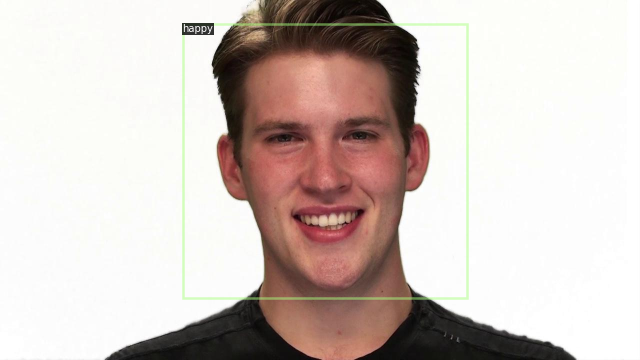

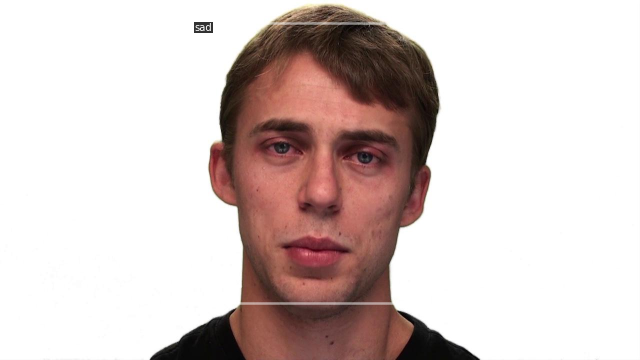

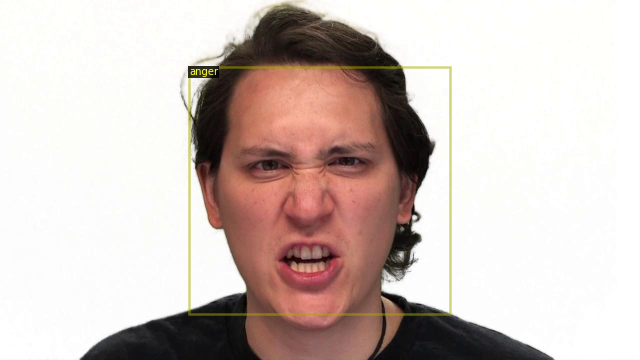

In [4]:
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [5]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [6]:
from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[03/06 04:56:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:05, 72.2MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (7, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (7,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (24, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (24,) in the model! You might want to double check if this is expected.


[03/06 04:56:35 d2.engine.train_loop]: Starting training from iteration 0
[03/06 04:57:35 d2.utils.events]:  eta: 1:14:38  iter: 19  total_loss: 2.974  loss_cls: 2.065  loss_box_reg: 0.924  loss_rpn_cls: 0.001  loss_rpn_loc: 0.009  time: 3.0184  data_time: 0.0334  lr: 0.000020  max_mem: 10868M
[03/06 04:58:37 d2.utils.events]:  eta: 1:14:54  iter: 39  total_loss: 2.378  loss_cls: 1.489  loss_box_reg: 0.884  loss_rpn_cls: 0.001  loss_rpn_loc: 0.008  time: 3.0651  data_time: 0.0117  lr: 0.000040  max_mem: 10868M
[03/06 04:59:42 d2.utils.events]:  eta: 1:15:11  iter: 59  total_loss: 1.663  loss_cls: 0.784  loss_box_reg: 0.875  loss_rpn_cls: 0.000  loss_rpn_loc: 0.007  time: 3.1321  data_time: 0.0144  lr: 0.000060  max_mem: 10868M
[03/06 05:00:50 d2.utils.events]:  eta: 1:16:11  iter: 79  total_loss: 1.466  loss_cls: 0.597  loss_box_reg: 0.865  loss_rpn_cls: 0.000  loss_rpn_loc: 0.007  time: 3.1928  data_time: 0.0124  lr: 0.000080  max_mem: 10868M
[03/06 05:01:57 d2.utils.events]:  eta: 1:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir output

In [7]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [03/06 06:22:12 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/06 06:22:12 d2.data.datasets.coco]: Loaded 15 images in COCO format from /content/test/_annotations.coco.json
[03/06 06:22:12 d2.data.build]: Distribution of instances among all 6 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|   images   | 0            |   anger    | 3            |  disguist  | 0            |
|   happy    | 2            |    sad     | 2            |  surprise  | 4            |
|            |              |            |              |            |              |
|   total    | 11           |            |              |            |              |
[03/06 06:22:12 d2.data.common]: Serializing 15 elements to byte tensors and concatenating them all ...
[03/06 06:22:12 d2.data.common]: Serialized da

OrderedDict([('bbox',
              {'AP': 57.56188118811881,
               'AP-anger': 49.15841584158416,
               'AP-disguist': nan,
               'AP-happy': 72.52475247524752,
               'AP-images': nan,
               'AP-sad': 40.39603960396039,
               'AP-surprise': 68.16831683168317,
               'AP50': 85.51980198019803,
               'AP75': 75.12376237623762,
               'APl': 57.56188118811881,
               'APm': nan,
               'APs': nan})])

In [8]:
%ls ./output/

coco_instances_results.json                        last_checkpoint
events.out.tfevents.1615006589.57b1ce238f88.216.0  metrics.json
instances_predictions.pth                          model_final.pth


In [9]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

In [10]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])


Output hidden; open in https://colab.research.google.com to view.